In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True
import seaborn as sns
import numpy as np

In [2]:
#Data from U.S. Bureau of Economic Analysis, “CAINC1” https://apps.bea.gov/regional/downloadzip.cfm
df = pd.read_csv('CAINC1__ALL_AREAS_1969_2022.csv',engine='python',encoding='latin1')
df

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"""00000""",United States,,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,14063283000,14778160000,15467113000,15884741000,16658962000,17514402000,18343601000,19609985000,21392812000,21820248000
1,"""00000""",United States,,CAINC1,2.0,...,Population (persons) 1/,Number of persons,201298000,203798722,...,316735375,319270047,321829327,324367742,326623063,328542157,330233102,331511512,332031554,333287557
2,"""00000""",United States,,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,3931,4198,...,44401,46287,48060,48971,51004,53309,55547,59153,64430,65470
3,"""01000""",Alabama,5,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,9737715,10628318,...,173720680,179487109,187474744,190871820,197963769,205674190,215165840,230872566,252791890,258362172
4,"""01000""",Alabama,5,CAINC1,2.0,...,Population (persons) 1/,Number of persons,3440000,3449846,...,4864399,4886793,4908162,4930595,4952202,4976395,5003418,5031362,5049846,5074296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599,"""98000""",Far West,8,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,4570,4855,...,46861,49358,52277,54118,56427,59137,62203,67439,74015,74352
9600,Note: See the included footnote file.,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9601,CAINC1: County and MSA personal income summary...,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9602,"Last updated: November 16, 2023-- new statisti...",None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [3]:
#Remove quote characters from FIPS
df.GeoFIPS = df.GeoFIPS.replace('\"','', regex=True)
df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,00000,United States,,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,14063283000,14778160000,15467113000,15884741000,16658962000,17514402000,18343601000,19609985000,21392812000,21820248000
1,00000,United States,,CAINC1,2.0,...,Population (persons) 1/,Number of persons,201298000,203798722,...,316735375,319270047,321829327,324367742,326623063,328542157,330233102,331511512,332031554,333287557
2,00000,United States,,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,3931,4198,...,44401,46287,48060,48971,51004,53309,55547,59153,64430,65470
3,01000,Alabama,5,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,9737715,10628318,...,173720680,179487109,187474744,190871820,197963769,205674190,215165840,230872566,252791890,258362172
4,01000,Alabama,5,CAINC1,2.0,...,Population (persons) 1/,Number of persons,3440000,3449846,...,4864399,4886793,4908162,4930595,4952202,4976395,5003418,5031362,5049846,5074296


In [4]:
#Remove leading whitespace and check first entry
df.GeoFIPS = df.GeoFIPS.str.lstrip()
df.loc[0,'GeoFIPS']

'00000'

In [5]:
#Remove rows without names
df = df.loc[~(df.GeoName.isna())]

In [6]:
#Filter to rows that concern counties, rather than states or the entire country
df = df.loc[(~df.GeoFIPS.str.endswith('000')) & (df.LineCode == 3.0)]

In [7]:
#Remove asterisk from county names
df.GeoName = df.GeoName.replace('\*','', regex=True)

In [8]:
#Split county names into county and state abbreviation
df[['county', 'state']] = df['GeoName'].str.rsplit(', ', n=1, expand=True)
df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2015,2016,2017,2018,2019,2020,2021,2022,county,state
8,01001,"Autauga, AL",5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2780,3158,...,38130,39022,39922,41076,42550,45151,48914,49391,Autauga,AL
11,01003,"Baldwin, AL",5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2760,2905,...,41502,43012,44498,45852,47911,51230,55865,56747,Baldwin,AL
14,01005,"Barbour, AL",5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2147,2545,...,31024,31035,31963,33211,34685,37111,40795,40560,Barbour,AL
17,01007,"Bibb, AL",5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,1988,2359,...,28760,28584,28877,30033,32104,34938,37175,37513,Bibb,AL
20,01009,"Blount, AL",5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2625,2595,...,32469,32532,33781,35275,36561,38133,42852,43744,Blount,AL


In [9]:
#Melt into long format.
df = pd.melt(df, id_vars=['GeoFIPS','county','state'], value_vars=list(df.columns)[8:-2])
df

,GeoFIPS,county,state,variable,value
0,01001,Autauga,AL,1969,2780
1,01003,Baldwin,AL,1969,2760
2,01005,Barbour,AL,1969,2147
3,01007,Bibb,AL,1969,1988
4,01009,Blount,AL,1969,2625
...,...,...,...,...,...
169555,56037,Sweetwater,WY,2022,58374
169556,56039,Teton,WY,2022,406054
169557,56041,Uinta,WY,2022,44775
169558,56043,Washakie,WY,2022,55288


In [10]:
#Rename columns
df.columns = ['FIPS','county','state_abbr','date','average_income']
df.head()

,FIPS,county,state_abbr,date,average_income
0,01001,Autauga,AL,1969,2780
1,01003,Baldwin,AL,1969,2760
2,01005,Barbour,AL,1969,2147
3,01007,Bibb,AL,1969,1988
4,01009,Blount,AL,1969,2625


In [11]:
#Add July first date to make consistent with other datasets
df.date = df.date.astype(str)+'-07-01'
df.head()

,FIPS,county,state_abbr,date,average_income
0,01001,Autauga,AL,1969-07-01,2780
1,01003,Baldwin,AL,1969-07-01,2760
2,01005,Barbour,AL,1969-07-01,2147
3,01007,Bibb,AL,1969-07-01,1988
4,01009,Blount,AL,1969-07-01,2625


Adjusted cpi from: https://www.bls.gov/cpi/research-series/r-cpi-u-rs-home.htm

In [12]:
#Income must be adjusted for inflation. The usual way is to use the Consumer Price Index.
#Since the way the CPI has been calculated has changed over time, it is more accurate to use an adjusted CPI.
#Adjusted CPI from: https://www.bls.gov/cpi/research-series/r-cpi-u-rs-home.htm
cpi = pd.read_csv('r-cpi-u-rs-allitems.csv')
cpi

,date,adjusted_CPI
0,1978,104.4
1,1979,114.3
2,1980,127.1
3,1981,139.1
4,1982,147.5
5,1983,153.8
6,1984,160.2
7,1985,165.6
8,1986,168.4
9,1987,174.1


<Axes: xlabel='date', ylabel='adjusted_CPI'>

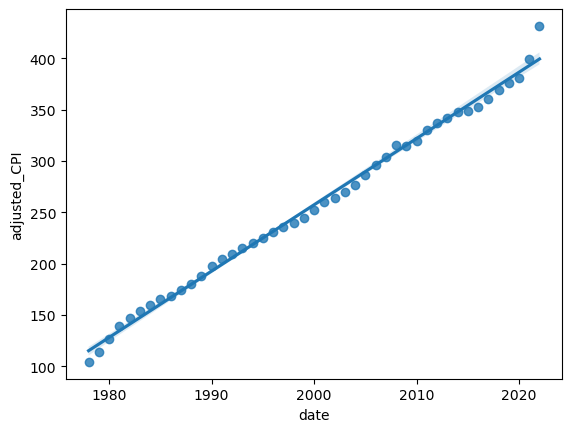

In [13]:
#This adjusted CPI only goes back to 1978, whereas the income data goes back to 1969.
#I will use linear regression to extend the CPI.

#Displays linear regression for the data's current dates.
sns.regplot(cpi, x='date',y='adjusted_CPI')

In [14]:
#Dictionary to extend dates in the adjusted CPI dataframe
extend = dict(zip(list(range(1969,1978)), [np.nan]*9))
extend

{1969: nan,
 1970: nan,
 1971: nan,
 1972: nan,
 1973: nan,
 1974: nan,
 1975: nan,
 1976: nan,
 1977: nan}

In [15]:
#Dataframe to extend dates
extend_df = pd.DataFrame.from_dict(extend, orient='index',
                       columns=['adjusted_CPI']).reset_index(names='date')

In [16]:
#Extend dates
extend_cpi = pd.concat([cpi,extend_df]).sort_values('date').reset_index(drop=True)
extend_cpi

,date,adjusted_CPI
0,1969,NaN
1,1970,NaN
2,1971,NaN
3,1972,NaN
4,1973,NaN
5,1974,NaN
6,1975,NaN
7,1976,NaN
8,1977,NaN
9,1978,104.4


In [17]:
#First attempt to use linear regression to fill in the missing values
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(cpi[['date']],cpi.adjusted_CPI)
r2_score = lr.score(cpi[['date']],cpi.adjusted_CPI)
r2_score

0.9936322104268706

In [18]:
x_test = extend_df[['date']]

In [19]:
y_pred = lr.predict(x_test)
extrapolated_cpi = [round(i,1) for i in y_pred]
extrapolated_cpi

[57.2, 63.7, 70.1, 76.6, 83.0, 89.5, 95.9, 102.4, 108.9]

In [20]:
extend_extrapolated = dict(zip(list(range(1969,1978)), extrapolated_cpi))
extend_extrapolated

{1969: 57.2,
 1970: 63.7,
 1971: 70.1,
 1972: 76.6,
 1973: 83.0,
 1974: 89.5,
 1975: 95.9,
 1976: 102.4,
 1977: 108.9}

In [21]:
extend_extrapolated_df = pd.DataFrame.from_dict(extend_extrapolated, orient='index',
                       columns=['adjusted_CPI']).reset_index(names='date')
extend_extrapolated_df

,date,adjusted_CPI
0,1969,57.2
1,1970,63.7
2,1971,70.1
3,1972,76.6
4,1973,83.0
5,1974,89.5
6,1975,95.9
7,1976,102.4
8,1977,108.9


In [22]:
cpi_extrap = pd.concat([cpi,extend_extrapolated_df]).sort_values('date').reset_index(drop=True)
cpi_extrap

,date,adjusted_CPI
0,1969,57.2
1,1970,63.7
2,1971,70.1
3,1972,76.6
4,1973,83.0
5,1974,89.5
6,1975,95.9
7,1976,102.4
8,1977,108.9
9,1978,104.4


<Axes: xlabel='date', ylabel='adjusted_CPI'>

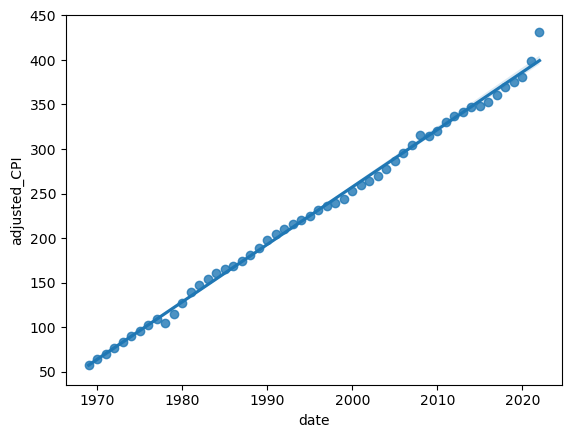

In [23]:
#Display results of first attempt
sns.regplot(cpi_extrap, x='date',y='adjusted_CPI')

In [24]:
#The jump between 1977 and 1978 is a bit too dramatic.
#I will use linear regression with an unadjusted CPI data to try to improve the extrapolation.
#Unadjusted CPI from: https://fred.stlouisfed.org/series/CPIAUCSL

un_cpi = pd.read_csv('CPI_1969-2022.csv')
un_cpi.head()

,date,CPI
0,1969,36.683333
1,1970,38.841667
2,1971,40.483333
3,1972,41.808333
4,1973,44.425000


<Axes: xlabel='date', ylabel='CPI'>

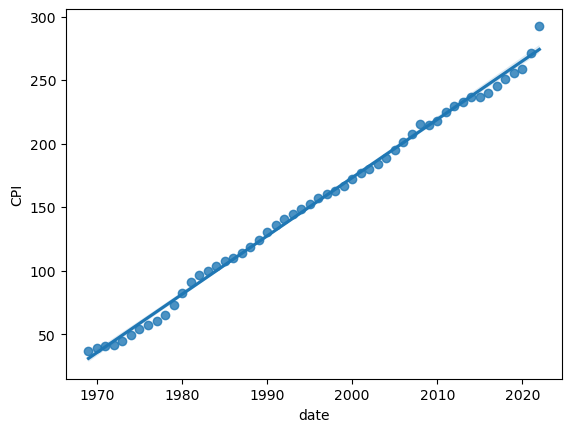

In [25]:
#Display reg plot for unadjusted CPI
sns.regplot(un_cpi, x='date',y='CPI')

In [26]:
#Merge adjusted and unadjusted CPI without extended dates
merged_cpi = pd.merge(left=cpi,right=un_cpi,on='date', how='left')
merged_cpi

,date,adjusted_CPI,CPI
0,1978,104.4,65.241667
1,1979,114.3,72.583333
2,1980,127.1,82.383333
3,1981,139.1,90.933333
4,1982,147.5,96.533333
5,1983,153.8,99.583333
6,1984,160.2,103.933333
7,1985,165.6,107.600000
8,1986,168.4,109.691667
9,1987,174.1,113.616667


In [27]:
#Score linear regression using adjusted and unadjusted CPI
lr = LinearRegression()
lr.fit(merged_cpi[['date','CPI']],merged_cpi.adjusted_CPI)
r2_score = lr.score(merged_cpi[['date','CPI']],merged_cpi.adjusted_CPI)
r2_score

0.9995281669132025

In [28]:
#Merge extended adjusted and unadjusted
merged_extend = pd.merge(left=extend_df, right=un_cpi, on='date',how='left')
merged_extend

,date,adjusted_CPI,CPI
0,1969,NaN,36.683333
1,1970,NaN,38.841667
2,1971,NaN,40.483333
3,1972,NaN,41.808333
4,1973,NaN,44.425000
5,1974,NaN,49.316667
6,1975,NaN,53.825000
7,1976,NaN,56.933333
8,1977,NaN,60.616667


In [29]:
#Second attempt at linear regression
x_test = merged_extend[['date','CPI']]

In [30]:
y_pred = lr.predict(x_test)
extrapolated_cpi = [round(i,1) for i in y_pred]
extrapolated_cpi

#[57.2, 63.7, 70.1, 76.6, 83.0, 89.5, 95.9, 102.4, 108.9] old extrapolation

[62.5, 65.3, 67.4, 69.0, 72.5, 79.5, 86.0, 90.2, 95.4]

In [31]:
extend_extrapolated = dict(zip(list(range(1969,1978)), extrapolated_cpi))
extend_extrapolated_df = pd.DataFrame.from_dict(extend_extrapolated, orient='index',
                       columns=['adjusted_CPI']).reset_index(names='date')
cpi_extrap = pd.concat([cpi,extend_extrapolated_df]).sort_values('date').reset_index(drop=True)
cpi_extrap

,date,adjusted_CPI
0,1969,62.5
1,1970,65.3
2,1971,67.4
3,1972,69.0
4,1973,72.5
5,1974,79.5
6,1975,86.0
7,1976,90.2
8,1977,95.4
9,1978,104.4


In [32]:
merged_cpi = pd.merge(left=cpi_extrap,right=un_cpi,on='date')
merged_cpi

,date,adjusted_CPI,CPI
0,1969,62.5,36.683333
1,1970,65.3,38.841667
2,1971,67.4,40.483333
3,1972,69.0,41.808333
4,1973,72.5,44.425000
5,1974,79.5,49.316667
6,1975,86.0,53.825000
7,1976,90.2,56.933333
8,1977,95.4,60.616667
9,1978,104.4,65.241667


<Axes: xlabel='date', ylabel='adjusted_CPI'>

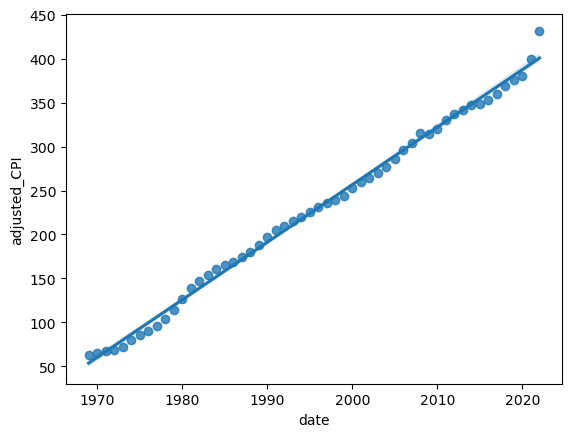

In [33]:
#Display results of second attempt. Looks good!
sns.regplot(cpi_extrap, x='date',y='adjusted_CPI')

In [34]:
#Make date consistent
cpi_extrap.date = cpi_extrap.date.astype('str') + '-07-01'
cpi_extrap

,date,adjusted_CPI
0,1969-07-01,62.5
1,1970-07-01,65.3
2,1971-07-01,67.4
3,1972-07-01,69.0
4,1973-07-01,72.5
5,1974-07-01,79.5
6,1975-07-01,86.0
7,1976-07-01,90.2
8,1977-07-01,95.4
9,1978-07-01,104.4


In [35]:
#Add adjusted CPI to county income df
df = pd.merge(left=df,right=cpi_extrap,on='date',how='left')
df

,FIPS,county,state_abbr,date,average_income,adjusted_CPI
0,01001,Autauga,AL,1969-07-01,2780,62.5
1,01003,Baldwin,AL,1969-07-01,2760,62.5
2,01005,Barbour,AL,1969-07-01,2147,62.5
3,01007,Bibb,AL,1969-07-01,1988,62.5
4,01009,Blount,AL,1969-07-01,2625,62.5
...,...,...,...,...,...,...
169555,56037,Sweetwater,WY,2022-07-01,58374,431.5
169556,56039,Teton,WY,2022-07-01,406054,431.5
169557,56041,Uinta,WY,2022-07-01,44775,431.5
169558,56043,Washakie,WY,2022-07-01,55288,431.5


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169560 entries, 0 to 169559
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FIPS            169560 non-null  object 
 1   county          169560 non-null  object 
 2   state_abbr      169560 non-null  object 
 3   date            169560 non-null  object 
 4   average_income  169560 non-null  object 
 5   adjusted_CPI    169560 non-null  float64
dtypes: float64(1), object(5)
memory usage: 7.8+ MB


In [37]:
#Replace '(NA)' with NaN
df.average_income = df.average_income.replace('(NA)',np.nan)
df[df.average_income.isna()]

,FIPS,county,state_abbr,date,average_income,adjusted_CPI
67,02010,Aleutian Islands Census Area,AK,1969-07-01,NaN,62.5
68,02013,Aleutians East Borough,AK,1969-07-01,NaN,62.5
69,02016,Aleutians West Census Area,AK,1969-07-01,NaN,62.5
71,02050,Bethel Census Area,AK,1969-07-01,NaN,62.5
73,02063,Chugach Census Area,AK,1969-07-01,NaN,62.5
...,...,...,...,...,...,...
166538,02925,Upper Yukon Division,AK,2022-07-01,NaN,431.5
166539,02926,Valdez-Chitina-Whittier Division,AK,2022-07-01,NaN,431.5
166540,02928,Wrangell-Petersburg Division,AK,2022-07-01,NaN,431.5
166541,02929,Yukon-Koyukuk Division,AK,2022-07-01,NaN,431.5


In [38]:
#Drop rows with no income data, as there is no advantage to having these rows for my purposes.
df = df.dropna()

In [39]:
#Change income data type to float
df.average_income = df.average_income.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167919 entries, 0 to 169559
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FIPS            167919 non-null  object 
 1   county          167919 non-null  object 
 2   state_abbr      167919 non-null  object 
 3   date            167919 non-null  object 
 4   average_income  167919 non-null  float64
 5   adjusted_CPI    167919 non-null  float64
dtypes: float64(2), object(4)
memory usage: 9.0+ MB


In [40]:
#Create column for uninflated income
df['uninflated_income'] = round(df.average_income*(431.5/df.adjusted_CPI))
df

,FIPS,county,state_abbr,date,average_income,adjusted_CPI,uninflated_income
0,01001,Autauga,AL,1969-07-01,2780.0,62.5,19193.0
1,01003,Baldwin,AL,1969-07-01,2760.0,62.5,19055.0
2,01005,Barbour,AL,1969-07-01,2147.0,62.5,14823.0
3,01007,Bibb,AL,1969-07-01,1988.0,62.5,13725.0
4,01009,Blount,AL,1969-07-01,2625.0,62.5,18123.0
...,...,...,...,...,...,...,...
169555,56037,Sweetwater,WY,2022-07-01,58374.0,431.5,58374.0
169556,56039,Teton,WY,2022-07-01,406054.0,431.5,406054.0
169557,56041,Uinta,WY,2022-07-01,44775.0,431.5,44775.0
169558,56043,Washakie,WY,2022-07-01,55288.0,431.5,55288.0


In [41]:
#Dictionary for updating FIPS and county names so they are recognized by Tableau.
#See here for details: https://github.com/spearitual/Updated-FIPS-codes-for-Tableau 
FIPS_swapper = {'02010': '02016',
 '02201': '02198',
 '02231': '02105',
 '02232': '02105',
 '02280': '02195',
 '02901': '02016',
 '02903': '02105',
 '02904': '02185',
 '02905': '02050',
 '02907': '02164',
 '02908': '02066',
 '02910': '02100',
 '02912': '02122',
 '02916': '02290',
 '02919': '02130',
 '02920': '02198',
 '02921': '02122',
 '02922': '02220',
 '02923': '02282',
 '02924': '02240',
 '02925': '02290',
 '02926': '02063',
 '02928': '02275',
 '02929': '02290',
 '15901': '15009',
 '51901': '51003',
 '51903': '51005',
 '51907': '51015',
 '51911': '51031',
 '51913': '51035',
 '51918': '51053',
 '51919': '51059',
 '51921': '51069',
 '51923': '51081',
 '51929': '51089',
 '51931': '51095',
 '51933': '51121',
 '51939': '51143',
 '51941': '51149',
 '51942': '51153',
 '51944': '51161',
 '51945': '51163',
 '51947': '51165',
 '51949': '51175',
 '51951': '51177',
 '51953': '51191',
 '51955': '51195',
 '51958': '51199',
 '55901': '55115',
 '09001': '09190',
 '09013': '09170'}
name_swapper = {
'Kuskokwim Division':'Yukon-Koyukuk Census Area',
'Upper Yukon Division':'Yukon-Koyukuk Census Area',
'Yukon-Koyukuk Division':'Yukon-Koyukuk Census Area',
'Kenai-Cook Inlet Division':'Kenai Peninsula Borough',
'Seward Division':'Kenai Peninsula Borough',
'Outer Ketchikan Division':'Ketchikan Gateway Borough'
}

In [42]:
#Update FIPS
for old_FIPS, new_FIPS in FIPS_swapper.items():
    df['FIPS'] = df.FIPS.replace(old_FIPS, new_FIPS)
for old_name, new_name in name_swapper.items():
    df['county'] = df.county.replace(old_name, new_name)
df

,FIPS,county,state_abbr,date,average_income,adjusted_CPI,uninflated_income
0,01001,Autauga,AL,1969-07-01,2780.0,62.5,19193.0
1,01003,Baldwin,AL,1969-07-01,2760.0,62.5,19055.0
2,01005,Barbour,AL,1969-07-01,2147.0,62.5,14823.0
3,01007,Bibb,AL,1969-07-01,1988.0,62.5,13725.0
4,01009,Blount,AL,1969-07-01,2625.0,62.5,18123.0
...,...,...,...,...,...,...,...
169555,56037,Sweetwater,WY,2022-07-01,58374.0,431.5,58374.0
169556,56039,Teton,WY,2022-07-01,406054.0,431.5,406054.0
169557,56041,Uinta,WY,2022-07-01,44775.0,431.5,44775.0
169558,56043,Washakie,WY,2022-07-01,55288.0,431.5,55288.0


In [43]:
#Dictionary just for Connecticut counties
FIPS_swapper = {'09005':'09160',
               '09009':'09140',
               '09003':'09110',
               '09007':'09130',
               '09015':'09150',
               '09011':'09180'}

In [44]:
#Swapping FIPS only after 2020
for old_FIPS, new_FIPS in FIPS_swapper.items():
    df.loc[(df['date'] >= "2020-07-01") & (df['FIPS'] == old_FIPS), "FIPS"] = new_FIPS

In [45]:
#Averaging incomes in combined areas.
#The combined areas may not have populations of equal size, so the mean of the means will not be totally precise.
df = df.groupby(['FIPS','date','county','state_abbr','adjusted_CPI']).agg('mean').reset_index()

In [46]:
#Combine county and state abbreviation
df['county_state'] = df.county + ', ' + df.state_abbr
df.head()

,FIPS,date,county,state_abbr,adjusted_CPI,average_income,uninflated_income,county_state
0,01001,1969-07-01,Autauga,AL,62.5,2780.0,19193.0,"Autauga, AL"
1,01001,1970-07-01,Autauga,AL,65.3,3158.0,20868.0,"Autauga, AL"
2,01001,1971-07-01,Autauga,AL,67.4,3454.0,22113.0,"Autauga, AL"
3,01001,1972-07-01,Autauga,AL,69.0,3687.0,23057.0,"Autauga, AL"
4,01001,1973-07-01,Autauga,AL,72.5,4039.0,24039.0,"Autauga, AL"


In [47]:
#Reorder columns
df = df[['FIPS','date','county','state_abbr','county_state','adjusted_CPI','average_income','uninflated_income']]
df.head()

,FIPS,date,county,state_abbr,county_state,adjusted_CPI,average_income,uninflated_income
0,01001,1969-07-01,Autauga,AL,"Autauga, AL",62.5,2780.0,19193.0
1,01001,1970-07-01,Autauga,AL,"Autauga, AL",65.3,3158.0,20868.0
2,01001,1971-07-01,Autauga,AL,"Autauga, AL",67.4,3454.0,22113.0
3,01001,1972-07-01,Autauga,AL,"Autauga, AL",69.0,3687.0,23057.0
4,01001,1973-07-01,Autauga,AL,"Autauga, AL",72.5,4039.0,24039.0


In [48]:
#Export to csv
#df.to_csv('county_income_1969-2022_cleaned_4.csv', index=False)

In [49]:
1/0

ZeroDivisionError: division by zero

In [ ]:
state = pd.read_csv('state_income_1969-2022.csv')
state

In [ ]:
df = pd.merge(left=df,right=state,on=['date','state_abbr'],how='outer')
df

In [ ]:
USA = pd.read_csv('USA_income_1969-2020.csv')
USA

In [ ]:
df = pd.merge(left=df,right=USA,on=['date'],how='outer')
df

In [ ]:
df['percent_of_state_income'] = round((df.uninflated_income/df.state_uninflated_income)*100,2)
df['percent_of_US_income'] = round((df.uninflated_income/df.US_uninflated_income)*100,2)
df

In [ ]:
df.to_csv('county_income_1969-2022_cleaned_5.csv', index=False)

In [ ]:
1/0

In [ ]:
df.loc[(df.county.str.contains('Wrangell'))]

#### Creating dictionaries for merging VA cities and counties for other datasets

In [ ]:
df.loc[(df.county.str.contains('\+', regex = True))]

In [ ]:
df[['VA_county', 'VA_city']] = df.county.str.split(' \+ ', n=1, expand=True)
df = df.dropna()

In [ ]:
df[['VA_county', 'VA_city_2']] = df.VA_county.str.split('\, ', n=1, expand=True)
df

In [ ]:
df = df.groupby('VA_county').first().reset_index()
df

In [ ]:
df.VA_county = df.VA_county.astype('str') + ' County'
df

In [ ]:
df = pd.melt(df, id_vars=['VA_county','FIPS','county'], value_vars=['VA_city','VA_city_2']).dropna().drop('variable',axis=1)

In [ ]:
df.value = df.value.astype('str') + ' city'
df

In [ ]:
df.value = df.value.str.replace('City city','city')
df.value = df.value.str.replace('Kalawao city','Kalawao County')
df = df.reset_index(drop=True)
df

In [ ]:
old_FIPS = ['51540','51580','51820','51680','51640','51730','51610','51840',
           '51595','51690','51830','15005','51750','51590','51670','51685',
           '51775','51678','51660','51620','51630','51520','51720','51735',
            '51790','51570','51600','51683','51530']

In [ ]:
df['old_FIPS'] = pd.Series(old_FIPS) 
df

In [ ]:
FIPS_swapper = dict(zip(df.old_FIPS,df.FIPS))
name_swapper = dict(zip(df.value,df.county)) | dict(zip(df.VA_county,df.county))
name_swapper

In [ ]:
FIPS_swapper